# Enunciado
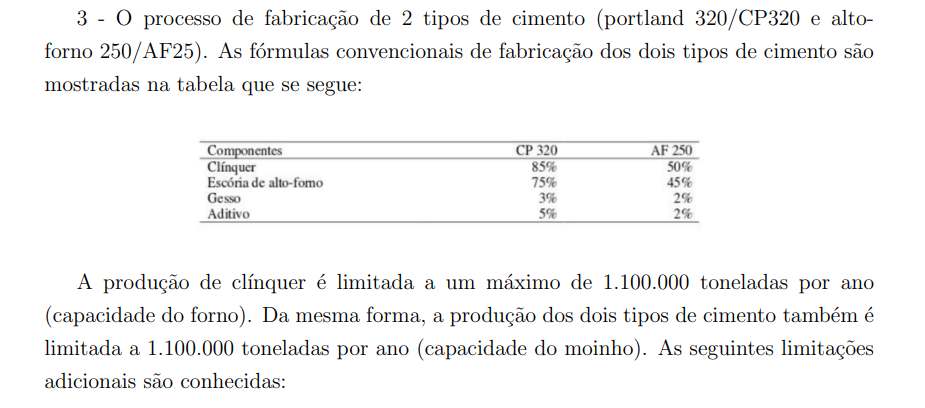
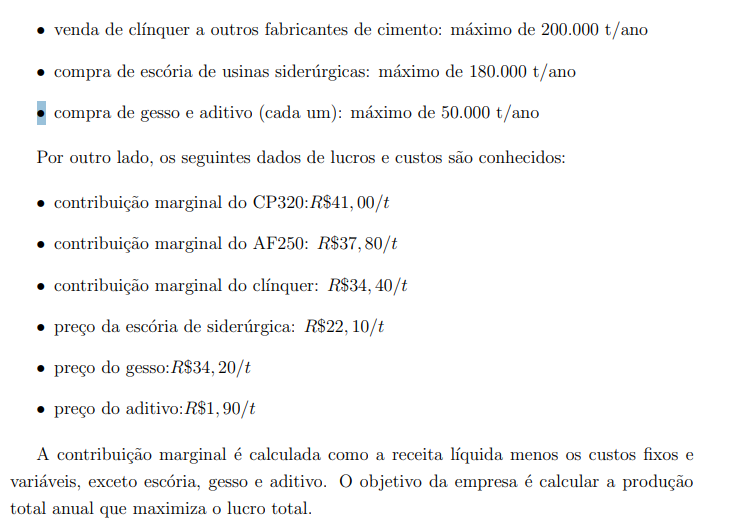

In [ ]:
import gurobipy as gp
from gurobipy import GRB

#  Modelo 
m = gp.Model("Lucro_Cimenteira")

# --- Conjuntos e Dados ---
PROD = ['A', 'B']
MAT  = ['Escoria', 'Gesso', 'Aditivo']

RECEITA = [41.0, 37.8]
CUSTO   = [22.1, 34.2, 1.9]
PRECO_CLINQ = 34.4

LIM_MOINHO, LIM_FORNO, LIM_VENDA = 1.1e6, 1.1e6, 2e5
LIM_COMPRA = [1.8e5, 5e4, 5e4]

CONSUMO_CLINQ = [0.85, 0.50]
CONSUMO_MAT = [
    [0.75, 0.45],
    [0.03, 0.02],
    [0.05, 0.03]
]

#  Variáveis 
x = m.addVars(PROD, name="Cimento")            # produção
y = m.addVars(MAT, name="Compra")              # compra
z_prod = m.addVar(name="Clinquer_Prod")        # produção clínquer
z_vend = m.addVar(name="Clinquer_Venda")       # venda clínquer

#  Função Objetivo 
m.setObjective(
    gp.quicksum(RECEITA[i]*x[PROD[i]] for i in range(2))
  + PRECO_CLINQ * z_vend
  - gp.quicksum(CUSTO[j]*y[MAT[j]] for j in range(3)),
  GRB.MAXIMIZE
)

# Restrições 
m.addConstr(sum(x[p] for p in PROD) <= LIM_MOINHO)
m.addConstr(z_prod <= LIM_FORNO)
m.addConstr(z_vend <= LIM_VENDA)

for j in range(3):
    m.addConstr(y[MAT[j]] <= LIM_COMPRA[j])
    m.addConstr(sum(CONSUMO_MAT[j][i]*x[PROD[i]] for i in range(2)) <= y[MAT[j]])

m.addConstr(z_prod == sum(CONSUMO_CLINQ[i]*x[PROD[i]] for i in range(2)) + z_vend)

#  Otimização 
m.optimize()

#  Resultados 
if m.status == GRB.OPTIMAL:
    print(f"\nLucro Máximo: R$ {m.objVal:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    print("\nPlano Ótimo:")
    for v in m.getVars():
        if v.x > 1e-6:
            print(f"  {v.VarName}: {v.x:,.2f}".replace(",", "."))


# Resultados
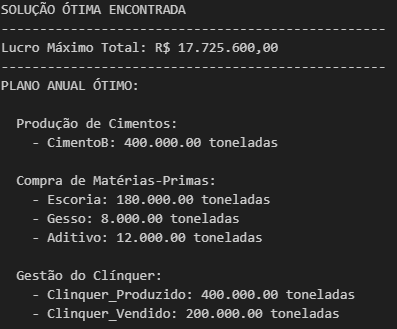

# Alguns Valores Foram alterados no enunciado original para melhor visualizção dos resultados